In [1]:
import pandas as pd 

# 윈도우 환경에서 파일을 그대로 읽으면 유니코드 에러 발생, encoding을 CP949로 강제 지정해준다
data = pd.read_csv('Input/shc_sample.csv',encoding='CP949')
## data = pd.read_csv('../Input/creditcard.csv',header=None)

In [2]:
print("신한카드 관련 기업후기 -  rows:",data.shape[0]," columns:", data.shape[1])

신한카드 관련 기업후기 -  rows: 143  columns: 18


In [3]:
data.head()

,회사이름,회사코드,리뷰코드,직종구분,재직상태,근무지역,등록일자,별점평가,승진기회,복지급여,워라밸,사내문화,경영진,기업장점,기업단점,바라는점,성장예상,추천여부
0,신한카드(주),23957,1030925,금융/재무,전직원,서울,2019/3/20,60,40,100,60,60,40,하는 업무에 비해 급여를 많이 받는다는 느낌이 든다.,관리자들이 별로다. 눈앞의 이익만 생각하고 개개인의 개인 플레이가 심하다.,기업의 미래를 생각했으면 한다 어떤 점이 회사애 도움이 될지를 생각했으면...,비슷,이 기업을 추천 합니다!
1,신한카드(주),23957,1026593,금융/재무,현직원,서울,2019/3/17,60,60,100,100,20,20,돈을 많이줌. 삼전 무선반도체 제외하고 국내 사기업 톱이라생각,"업무문화가 정말 이상함. 허례허식, 쓸때없는거를 중시하고 전문가를 천대함.",은행에서 낙하산 내려보내지말고 정말 카드업을 아는사람으로 배치하라,NaN,이 기업을 추천하지 않습니다.
2,신한카드(주),23957,1023953,서비스/고객지원,전직원,대전,2019/3/14,40,60,40,40,40,40,"오래 재직한다면, 본인이 업무에 대해 배우고자 하는 열정이 있다면, 교육적인 부분에...","복지 제도의 부족, 출퇴근 시간이 전혀 지켜지지 않음(출근은 일찍, 퇴근은 늦게) ...",직원들의 불만을 듣고 개선하기 위해 노력하는 척이라도 보여줬으면 좋겠음.\r회사 공...,비슷,이 기업을 추천하지 않습니다.
3,신한카드(주),23957,1016246,생산/제조,전직원,서울,2019/3/9,60,60,60,60,60,60,복지카드 생일 기프트카드 옆에 보라매 공원이 잇어서 쉬기 좋다,"단순업무 기계소리때문에 머리가 조금 아프다. 단순단순 하다., 미래가 없다. 외왜워...",시스템적으로 완벽 정규직채용을 바란다. 정규직이 아니면 미래가 없다,비슷,이 기업을 추천 합니다!
4,신한카드(주),23957,1010197,금융/재무,전직원,서울,2019/3/5,40,40,60,40,60,40,"성과제이기에 본인이 일한 만큼 받을 수 있음, 복리후생이 나쁘지는 않은편임","칼퇴불가, 성과강요가 있으며 성과가 눈에 보이지 않을경우 눈치가 보인다",직원들의 의견을 들어주셨으면 좋겠습니다.,비슷,이 기업을 추천하지 않습니다.


In [4]:
data.keys()

Index(['회사이름', '회사코드', '리뷰코드', '직종구분', '재직상태', '근무지역', '등록일자', '별점평가', '승진기회',
       '복지급여', '워라밸', '사내문화', '경영진', '기업장점', '기업단점', '바라는점', '성장예상', '추천여부'],
      dtype='object')

In [5]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/217607)*100})
missing_data

,total_missing,perc_missing
회사이름,0,0.000000
회사코드,0,0.000000
리뷰코드,0,0.000000
직종구분,0,0.000000
재직상태,0,0.000000
근무지역,0,0.000000
등록일자,0,0.000000
별점평가,0,0.000000
승진기회,0,0.000000
복지급여,0,0.000000


In [6]:
data['기업단점'].head()

0    관리자들이  별로다.  눈앞의  이익만  생각하고  개개인의  개인  플레이가  심하다.
1            업무문화가 정말 이상함. 허례허식, 쓸때없는거를 중시하고 전문가를 천대함.
2    복지 제도의 부족, 출퇴근 시간이 전혀 지켜지지 않음(출근은 일찍, 퇴근은 늦게) ...
3    단순업무 기계소리때문에 머리가 조금 아프다. 단순단순 하다., 미래가 없다. 외왜워...
4              칼퇴불가, 성과강요가 있으며 성과가 눈에 보이지 않을경우 눈치가 보인다
Name: 기업단점, dtype: object

In [7]:
clean_data=data

In [8]:
# clean_data.head()

### CountVectorizer: 문서 집합으로부터 단어의 수를 세어 BOW 벡터를 만든다

### 1. 아무런 전처리 없이 그냥 CounterVector를 써보기 - 이 경우에는 단순 띄어쓰기 기준으로 생성

주의할 것은 CountVectorizer는 오직 띄어쓰기만을 기준으로 단어를 자른 후에 BoW를 만든다는 점입니다. 이는 영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한글에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음을 의미합니다. 예를 들어 "봄과"와 "봄이"를 다르게 인식하기 때문에 CountVectorizer 사용 전에 어간 추출을 해 "봄"으로 통일시켜 주는 것이 좋습니다.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# 불용어(stopwords) 정의
# 이 단계를 수행하지 않고 word cloud를 그리면 불필요한 조사' 등이 count가 높게 나온다
# 파이썬 NLTK library에 사전 정의된 불용어는 영어만 있어서, 한국어 불용어는 직접 정의

stopwords = ['까지,','그때', '그래도', '그래서', '그러', '그런','그렇','그리고','는데','니다','다고','다가','다는','다시피','라는','라도','라지만','랍시고','려고','려면','로부터','보다','습니다','아서','어서','에서', '으로','으며','으면','으므로','은데','이나','입니다','지만','하고','하도','해도','해서','해야','한다','합니다', '10','100','12','20','200','30','40','80','거나','는다', '는지','대한','동안', '된다','때문','라고', '라면', '마다','어요','에게','으나', '으라','이란','구요']

In [11]:
countvectorizer = CountVectorizer(stop_words=stopwords)
# # max_features=100 이렇게 파라미터를 주면 자주 나오는 단어 100개를 토대로 벡터화

In [12]:
tmp = countvectorizer.fit_transform(data['기업단점']) 

In [13]:
num_sample, num_features = tmp.shape
print("#sample: %d, #fearutes: %d" % (num_sample, num_features))

#sample: 143, #fearutes: 1664


(불용어를 제외하고) 1664개 단어로 구성된 143개의 게시물이 벡터화

In [14]:
print(countvectorizer.get_feature_names())

['100점', '10분씩이라지만', '10분이', '10분이지', '12개정도', '12일', '1년', '1년에', '1년하고', '1등을', '1명정도는', '1위라는', '1위를', '1위만큼', '1위인', '1주일만에', '200콜', '2년', '2년계약', '2년계약가능', '2년동안', '2년만', '2년밖에', '2년파견', '2년후', '30대', '30분', '30분까지해야함', '30분전에', '3개월이', '40세', '4년이라는시간이지나는데', '6개월후', '6분', '6시', '6시에', '6일', '7시', '7시반', '7시쯤', '80프로', '8시', '8시30분에', '9시', '9시까지', '9시까지라고들', '9시인데', 'ceo', 'db로', 'dvd빌리고', 'it', 'it조직은', 'lg', 'tm', 'ucc찍으라', 'ㅇ실적만', 'ㅠㅠㅠㅠㅠㅠㅠㅠㅠ', '가기가', '가난가난해짐', '가는', '가능', '가능성', '가방들고', '가장', '가장큰', '가족적인', '가진', '각자의', '각종', '간다하면', '간혹', '갈굼이', '갈등요소가', '감성', '감히', '갑이다', '강도가', '강도에', '강요', '강요로', '강요함', '강제로', '강하여', '강한', '강한편임', '강해서', '갖출', '같다', '같습니다', '같으나', '같은', '개개인의', '개개인이', '개고생8시', '개념이', '개발', '개발자인데', '개인', '개인별', '개인영업이라', '개인이', '개인적으로는', '갭이', '거의', '거쳐', '걸림돌이', '걸친', '것과', '것도', '것으로', '것이', '것이다', '것인가', '겨우쓰면다행', '경력순', '경력직', '경력직은', '경력직이', '경영을', '경영진뿐', '경영진의', '경우', '경우가', '경우는', '경쟁력도', '경쟁력을', '경쟁시킴', '경쟁에', '경쟁을', '경쟁이', '경직된', '경향이', '계속', '

위의 feature들을 보면 단순히 띄어쓰기로만 문장을 쪼깼기 때문에 '휴가', '휴가를' 이런 동일한 뜻을 가진 단어들을 다 분리해서 vector화

### 2. 형태소분석기를 이용하여 정제한 데이터로 CountVectorizer 실행

CountVectorizer는 문서를 token count matrix로 변환

### Konlpy 패키지 설치 과정
1. JPype1 설치<br>
pip install JPype1로 설치 시도했는데 에러가 남. 
검색해보니 https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 주소에 들어가서 직접 본인의 python 버젼과 OS에 맞는 wheel 파일을 설치하라고 함
(관련 링크 https://ericnjennifer.github.io/python_visualization/2018/01/21/PythonVisualization_Chapt1.html)

근데 설치할 때 난 에러는 error: Microsoft Visual C++ 14.0 is required. Get it with "Microsoft Visual C++ Build Tools": http://landinghub.visualstudio.com/visual-cpp-build-tools
이와 같이 Visual C++ Build Tools 오류였기 때문에 그냥 정공법(?)으로 MS 툴을 다운로드함
(다운로드 방법은 https://needjarvis.tistory.com/224 참고)
다운로드 하고 다시 pip install JPype1 하니 성공

2. Konlpy 설치<br>
전체 설치 과정은 아래 참조
https://ericnjennifer.github.io/python_visualization/2018/01/21/PythonVisualization_Chapt1.html

형태소분석기는 Konlpy 내에 탑재된 꼬꼬마, 한나눔, 은전한닢 등의 형태소분석기가 있고, Konlpy는 아니지만
최근에 카카오에서 만든 카카오 형태소 분석기(khaiii)도 있는데 이걸 써보고 싶지만 이건 리눅스에서만 실행 가능...

In [15]:
from eunjeon import Mecab

In [16]:

# 텍스트의 구성요소를 형태소 단위로 쪼갠다
for i, document in enumerate(data['기업단점']):
    mecab = Mecab()
    clean_words = mecab.morphs(document) # 형태소 분석
    
    # Detokenization : 형태소 단위로 쪼갠 단어(token)을 분석을 위한 document로 쓰기 위해 다시 이어 붙임
    clean_data['기업단점'][i]=' '.join(clean_words)

# warning이 나는데 왜 나는지 모르겠으니 그냥 진행

C:\Users\JY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
# 형태소분석 처리가 된 게시물을 토대로 vector화 : text를 TDM으로 변환

countvectorizer.fit(clean_data['기업단점'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['까지,', '그때', '그래도', '그래서', '그러', '그런', '그렇', '그리고', '는데', '니다', '다고', '다가', '다는', '다시피', '라는', '라도', '라지만', '랍시고', '려고', '려면', '로부터', '보다', '습니다', '아서', '어서', '에서', '으로', '으며', '으면', '으므로', '은데', '이나', '입니다', '지만', '하고', '하도', '해도', '해서', '해야', '한다', '합니다', '10', '100', '12', '20', '200', '30', '40', '80', '거나', '는다', '는지', '대한', '동안', '된다', '때문', '라고', '라면', '마다', '어요', '에게', '으나', '으라', '이란', '구요'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
# 문장에서 노출되는 feature(특징이 될만한 단어) 수를 합한 Document Term Matrix(이하 DTM)을 리턴
# fit_transform 함수를 이용해서 위의 fit, transform 단계를 한번에 수행할 수도 있다
dtmatrix = countvectorizer.transform(clean_data['기업단점'])

In [19]:
dtmatrix.shape

(143, 903)

904개 단어로 구성된 143개의 게시물이 벡터화 : 형태소분석기를 쓰지 않을 때와 비교해서 단어 갯수가 훨씬 줄었음을 알 수 있다

In [20]:
# matrix가 compressed Sparse Row format 형태로 되어 있어서 toarray 함수로 압축을 풀어줘야만 보인다 : 그냥 수행하면 안보임
dtmatrix

<143x903 sparse matrix of type '<class 'numpy.int64'>'
	with 1752 stored elements in Compressed Sparse Row format>

In [21]:
doc = dtmatrix[0].toarray()
print(doc)

# 아래는 첫번째 문장 '관리자들이 별로다. 눈앞의 이익만 생각하고 개개인의 개인 플레이가 심하다.'를 
# 단어의 빈도수에 따라 vector로 표현한 것이다

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [22]:
# 904개 단어로 구성된 사전 (불용어 제외)
countvectorizer.vocabulary_

{'ceo': 0,
 'db': 1,
 'dvd': 2,
 'it': 3,
 'lg': 4,
 'ob': 5,
 'tm': 6,
 'ucc': 7,
 'ㅇ실적만': 8,
 'ㅠㅠㅠㅠㅠㅠㅠㅠㅠ': 9,
 '가난': 10,
 '가능': 11,
 '가방': 12,
 '가장': 13,
 '가족': 14,
 '가지': 15,
 '가진': 16,
 '각자': 17,
 '각종': 18,
 '간다': 19,
 '간혹': 20,
 '갈굼': 21,
 '갈등': 22,
 '감성': 23,
 '감히': 24,
 '강도': 25,
 '강요': 26,
 '강제': 27,
 '강하': 28,
 '강한': 29,
 '강해서': 30,
 '갖출': 31,
 '개개인': 32,
 '개고생': 33,
 '개념': 34,
 '개발': 35,
 '개발자': 36,
 '개월': 37,
 '개인': 38,
 '개인영업': 39,
 '객수': 40,
 '거의': 41,
 '거쳐': 42,
 '건수': 43,
 '걸렸': 44,
 '걸리': 45,
 '걸림': 46,
 '걸림돌': 47,
 '걸친': 48,
 '겨우': 49,
 '경력': 50,
 '경력직': 51,
 '경영': 52,
 '경영진': 53,
 '경우': 54,
 '경쟁': 55,
 '경쟁력': 56,
 '경직': 57,
 '경향': 58,
 '계속': 59,
 '계약': 60,
 '계약직': 61,
 '계열': 62,
 '고객': 63,
 '고려': 64,
 '고장': 65,
 '고질병': 66,
 '곧장': 67,
 '공간': 68,
 '공부': 69,
 '공채': 70,
 '공통': 71,
 '과다': 72,
 '과장': 73,
 '관계': 74,
 '관두': 75,
 '관련': 76,
 '관료': 77,
 '관리자': 78,
 '관한': 79,
 '괜찮': 80,
 '굉장히': 81,
 '교육': 82,
 '구내식당': 83,
 '구성원': 84,
 '구조': 85,
 '구호': 86,
 '군기': 87,
 '군대': 88,
 '

In [23]:
words = countvectorizer.get_feature_names()

In [24]:
# 특정 단어를 vocabulary에서 찾으면, index를 return
countvectorizer.vocabulary_.get('꼰대')

124

In [25]:
# 첫번째 document(문장)에 들어 있는 단어들만 추출해본다
# : 관리자들이 별로다. 눈앞의 이익만 생각하고 개개인의 개인 플레이가 심하다.

[w # (4) 단어들의 리스트
for w, c # (2) 각 단어와 빈도 중에
in zip(words, doc.flat) # (1) 단어들과 빈도를 짝지운다.
if c > 0] # (3) 빈도가 0보다 큰

['개개인', '개인', '관리자', '눈앞', '별로', '생각', '심하', '이익', '플레이']

In [26]:
# 단어의 빈도 구하기
count = dtmatrix.sum(axis=0)
word_count = list(zip(words, count.flat))

In [27]:
# 정렬하기
import operator

word_order = sorted(
word_count,
key=operator.itemgetter(1), # 0이면 단어 순, 1이면 빈도 순
reverse=True) # 내림차순(역순)으로 정렬한다

In [28]:
# 가장 많이 나온 단어 상위 30개를 확인
word_order[:30]

[('업무', 47),
 ('시간', 33),
 ('실적', 33),
 ('문화', 20),
 ('스트레스', 18),
 ('팀장', 18),
 ('너무', 17),
 ('많이', 17),
 ('영업', 17),
 ('카드', 17),
 ('퇴근', 17),
 ('사람', 16),
 ('압박', 16),
 ('직원', 16),
 ('출근', 15),
 ('분위기', 14),
 ('계약직', 12),
 ('보수', 12),
 ('회사', 12),
 ('힘들', 12),
 ('부서', 11),
 ('승진', 11),
 ('점심', 11),
 ('고객', 10),
 ('인사', 10),
 ('적체', 10),
 ('심함', 9),
 ('야근', 9),
 ('연차', 9),
 ('가능', 8)]

In [29]:
import numpy as np

dist = np.sum(dtmatrix, axis=0)
#for tag, count in zip(words, dist):
#    print(count, tag)

# vector화된 feature들
pd.DataFrame(dist, columns=words)

,ceo,db,dvd,it,lg,ob,tm,ucc,ㅇ실적만,ㅠㅠㅠㅠㅠㅠㅠㅠㅠ,...,휴게실,휴무,흔히,흡연,흡연실,흡연자,희박,힘든,힘든데,힘들
0,1,1,1,2,1,1,1,1,1,1,...,1,2,1,1,1,1,1,3,1,12


In [30]:
pd.DataFrame(dtmatrix.toarray(), columns=words).head()

,ceo,db,dvd,it,lg,ob,tm,ucc,ㅇ실적만,ㅠㅠㅠㅠㅠㅠㅠㅠㅠ,...,휴게실,휴무,흔히,흡연,흡연실,흡연자,희박,힘든,힘든데,힘들
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Word Cloud 

https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud (Unofficial Windows Binaries for Python Extension Packages) <br>
여기서 본인에게 맞는 파일을 다운받고 해당 경로에서 pip install [파일명]

In [31]:
# 한글 폰트가 깨지는 문제 해결용
from matplotlib import font_manager, rc
font_path="c:/Windows/Fonts/NanumGothicExtraBold.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
from wordcloud import WordCloud

In [34]:
tmp_data = dict(word_count)

wc = WordCloud(font_path=font_path,
               background_color='white', max_font_size=170, width=500, height=500,
               relative_scaling=0.2)
wc = wc.generate_from_frequencies(tmp_data)

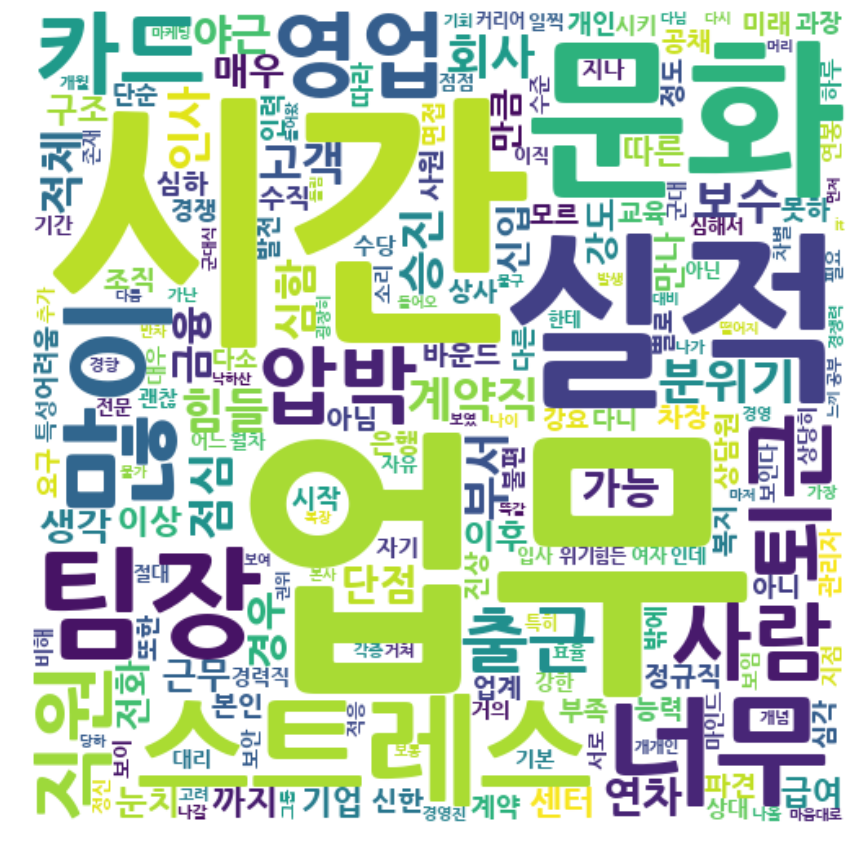

In [35]:
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
# plt.imshow(wc)
plt.axis("off")
plt.show()

#### 새로운 샘플 문장을 하나 정하고, 이 문장과 가장 거리가 가까운 문장을 찾아본다 (문장 간 거리는 Euclidean Distance로 계산)

In [36]:
new_sentence='꼰대가 많고 경직된 조직문화로 인해 아래 직원이 성장할 수 없음'
new_sentence_tokens = ' '.join(mecab.morphs(new_sentence))

print(new_sentence_tokens)

꼰대 가 많 고 경직 된 조직 문화 로 인해 아래 직원 이 성장 할 수 없 음


In [37]:
# 새로운 샘플 문장을 Vector화
new_sentence_vec = countvectorizer.transform([new_sentence_tokens])
# print(new_sentence_vec)
# 58, 126, 295, 628, 714, 754번째에 vector값(1)이 위치
# print(new_sentence_vec.toarray())
# pd.DataFrame(new_sentence_vec.toarray(), columns=words).head()

In [38]:
import numpy as np

# normalize 한 뒤 vector 간 거리를 계산하기 위한 함수
def dist_norm(v1, v2):
    v1_normalized = v1/np.linalg.norm(v1)
    v2_normalized = v2/np.linalg.norm(v2)
    delta = v1_normalized - v2_normalized
    return np.linalg.norm(delta)

In [39]:
import sys

best_dist = sys.maxsize
best_doc = None
best_i = None
 
for i, post in enumerate(clean_data['기업단점']):
    post_vec = dtmatrix.getrow(i)
    #print(post_vec.toarray())
    #np.linalg.norm(post_vec)
    d = dist_norm(post_vec.toarray(), new_sentence_vec.toarray())
    # print("=== Post %i with dist = %.2f: %s" % (i, d, post))
    if d < best_dist:
        best_dist = d
        best_i = i
        best_doc = post

In [40]:
# 샘플 문장과 가장 거리가 가까운 문장
print("Best post is %ith posts : [%s] with dist=%.2f" % (best_i, best_doc, best_dist))

Best post is 76th posts : [업계 특성 상 의 전 을 중시 한다 . 조직 문화 가 경직 된 편 .] with dist=1.00


In [41]:
# data['기업단점_정제'] = clean_data['기업단점'].tolist()
# data

### 3. TfidfVectorizer 사용

TF-IDF는 Term Frequency-Inverse Document Frequency의 줄임말로, 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 TDM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다. 사용 방법은 우선 TDM을 만든 후에, 거기에 TF-IDF 가중치를 주면됩니다.

CounterizeVector와 동일하게 위에서 형태소 분석기로 정제한 데이터를 그대로 이용
불용어(stopwords)도 CounterizeVector에서 이용한 것과 동일하게 쓴다
불용어를 포함하여 TF-IDF 수행해본 결과, 불필요한 조사가 너무 많이 나와서 추가함 

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidfvector = TfidfVectorizer(stop_words=stopwords, max_features=400)
# TF-IDF를 통해 산출한 단어의 중요도에 따라 최대 400개의 단어를 추출하도록 제약을 가함

tfidfmatrix = tfidfvector.fit_transform(clean_data['기업단점'])
print(tfidfmatrix.shape)

(143, 400)


In [44]:
# 추출된 400개의 단어: 형태소 분석으로 한번 정제된 데이터 기준으로 400개 단어를 추출
vocab = tfidfvector.get_feature_names()
print(vocab)

['it', '가난', '가능', '가장', '각종', '강도', '강요', '강한', '개개인', '개념', '개월', '개인', '거의', '거쳐', '경력직', '경영', '경영진', '경우', '경쟁', '경쟁력', '경향', '계약', '계약직', '고객', '고려', '공부', '공채', '과장', '관리자', '괜찮', '굉장히', '교육', '구조', '군대', '군대식', '권위', '그룹', '근무', '금융', '급여', '기간', '기본', '기업', '기회', '까지', '나가', '나갈', '나올', '나이', '낙하산', '너무', '눈치', '느끼', '능력', '다니', '다님', '다른', '다름', '다소', '다시', '단순', '단점', '당하', '대리', '대비', '대우', '돌림', '들어오', '들어왔', '따라', '따른', '떨어지', '또한', '똑같', '마음대로', '마인드', '마저', '마케팅', '만나', '만큼', '많이', '매우', '머리', '먼저', '면접', '모르', '못하', '문화', '미래', '바운드', '밖에', '반차', '발생', '발전', '별로', '보수', '보안', '보여', '보였', '보이', '보인다', '보임', '보통', '복장', '복지', '본사', '본인', '부서', '부족', '분위기', '불가', '불구', '불편', '비해', '빠르', '사람', '사용', '사원', '상담원', '상당히', '상대', '상사', '생각', '서로', '성과', '성향', '센터', '소리', '소속', '수당', '수압', '수준', '수직', '스트레스', '승급', '승진', '시간', '시대', '시작', '시장', '시점', '시키', '시킴', '신입', '신한', '실적', '심각', '심하', '심한', '심함', '심해서', '쓸데없', '아니', '아닌', '아님', '아무래도', '아무리', '아웃', '압박', '야근', '어느', '어려울'

In [45]:
data_array = tfidfmatrix.toarray()
data = pd.DataFrame(data_array, columns=vocab)
data.shape

(143, 400)

차원축소 방법 중 하나인 NMF를 이용하여 본문에서 특성 추출

In [46]:
# 총 40개(n_components)의 특징으로 특성을 압축하여 추출
from sklearn.decomposition import NMF

vector_array = tfidfmatrix.toarray()
nmf = NMF(n_components=40)
nmf.fit(vector_array)
# 추출된 40개의 features
features = nmf.transform(vector_array)

In [47]:
# 위에서 추출한 feature를 normalize
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
norm_features=normalizer.fit_transform(features)

#print(norm_features[0:2])
#df = pd.DataFrame(clean_data['기업단점'])
df_features = pd.DataFrame(norm_features,index=clean_data['기업단점'].tolist())
# df_features.head()

샘플 문장 하나를 갖고 유사도 분석을 해본다 

In [49]:
# 아래 문장은 document 내에서 하나 수기로 뽑은 거라 그때그때 소스를 바꿔줘야 ㅠㅠ
article = df_features.loc['칼 퇴 불가 , 성과 강요 가 있 으며 성과 가 눈 에 보이 지 않 을 경우 눈치 가 보인다']
# article = df_features.loc['수직 적 인 분 의 기 정치 로 평가 가 정확히 반영 되 는지 의문 이 듬']
similarities=df_features.dot(article)
top=similarities.nlargest()

# print(article)
# print(similarities)
# 위의 article과 유사도가 높은 문장 상위 3개를 보여준다
print(top)

칼 퇴 불가 , 성과 강요 가 있 으며 성과 가 눈 에 보이 지 않 을 경우 눈치 가 보인다                                                                                                                                                                                                                           1.000000
야근 이 빈번 하 게 발생 하나 시간 외 수당 은 없 고 , 정해진 날 에 만 시간 외 수당 발생 . 실적 을 강요 함 .                                                                                                                                                                                                          0.892179
업무 환경 , 추가 수당                                                                                                                                                                                                                                                                 0.887451
실적 강요 , 영업 강요 로 인해 스트레스 가 심함 , 영업 실적 에 따른 급여 차이                                                                                                                    

차원축소 방법 T-SNE를 이용하여 2차원에 시각화

In [50]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
Z = tsne.fit_transform(data_array.T)
# 400개 features로 이뤄진 vector들을 2차원에 표현하고자 함

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.004s...
[t-SNE] Computed neighbors for 400 samples in 0.094s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.181053
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.903030
[t-SNE] Error after 3550 iterations: 1.041551


In [51]:
print(Z[0:5])
print('Top words: ',len(Z))

[[ 13.092422   -2.9261348]
 [ -9.035663  -26.383419 ]
 [ 12.261426  -10.292411 ]
 [ -2.789964  -15.168699 ]
 [ -7.595986  -26.745205 ]]
Top words:  400


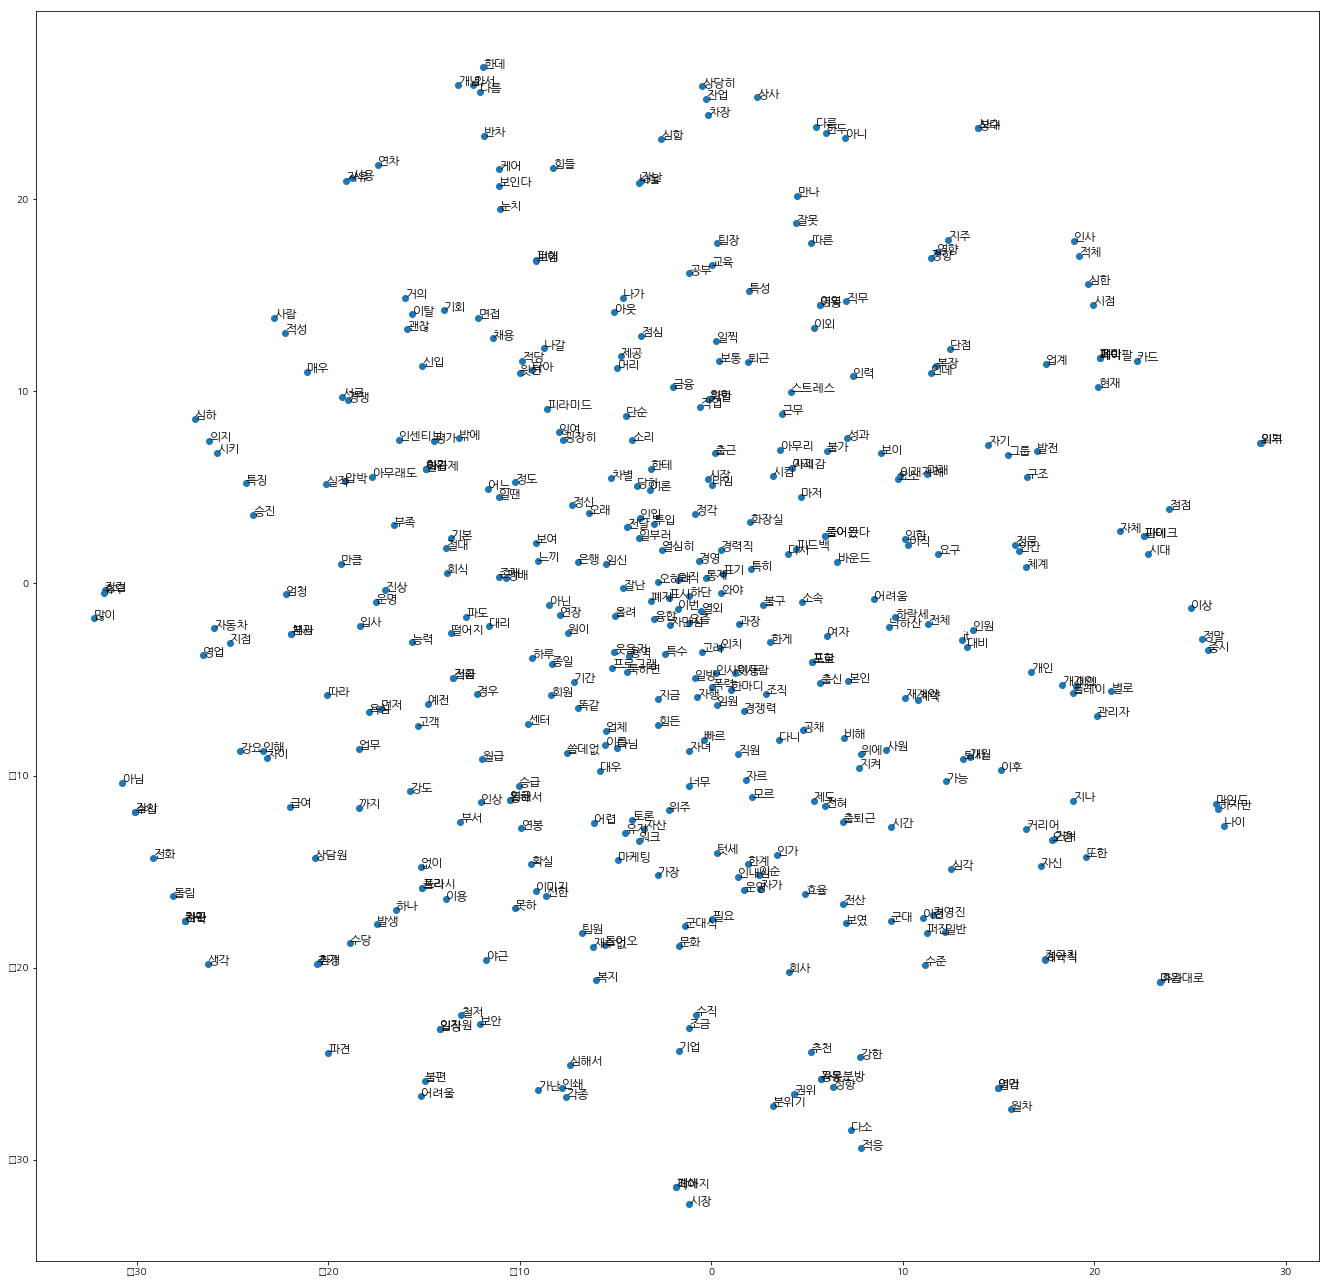

In [52]:
import matplotlib.font_manager as fm
font_path="c:/Windows/Fonts/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)


vocab = tfidfvector.get_feature_names()
# print(vocab)

# import matplotlib.pyplot as plt

plt.figure(figsize=(23,23))
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(vocab)):
    plt.annotate(s=vocab[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]), fontProperties=fontprop)


plt.draw()

위의 키워드를 보면 잘 보이지 않지만.. 같은 공간에 뭉쳐져 있는 키워드로

"인사"와 "적체", 
"군대식"과 "문화",
"권위"와 "분위기",
"상담원"과 "이직",
"스트레스"와 "근무",
"보안"과 "철저",
"관리자"과 "별로"
"계약직"과 "정규직" 등...

하지만 전체적으로 눈에 잘 보이지 않는 것 같아서 키워드를 조금 더 줄여본다

In [53]:
# max_features=200으로 하여 다시 fitting
tfidfvector = TfidfVectorizer(stop_words=stopwords, max_features=200)
# TF-IDF를 통해 산출한 단어의 중요도에 따라 최대 400개의 단어를 추출 

tfidfmatrix = tfidfvector.fit_transform(clean_data['기업단점'])

In [54]:
data_array = tfidfmatrix.toarray()

print(data_array.shape)
vocab = tfidfvector.get_feature_names()
print(vocab)
data = pd.DataFrame(data_array, columns=vocab)
data.shape

tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
Z = tsne.fit_transform(data_array.T)

(143, 200)
['가능', '강도', '강요', '강한', '개인', '거의', '경력직', '경우', '경쟁', '계약', '계약직', '고객', '공채', '과장', '관리자', '괜찮', '교육', '구조', '군대', '근무', '금융', '급여', '기간', '기본', '기업', '까지', '너무', '눈치', '능력', '다니', '다른', '다소', '단순', '단점', '대리', '대우', '들어오', '들어왔', '따라', '따른', '떨어지', '또한', '똑같', '마음대로', '마인드', '마저', '마케팅', '만나', '만큼', '많이', '매우', '머리', '먼저', '면접', '모르', '못하', '문화', '미래', '바운드', '밖에', '반차', '발생', '발전', '별로', '보수', '보안', '보여', '보였', '보이', '보인다', '보임', '보통', '복장', '복지', '본사', '본인', '부서', '부족', '분위기', '불편', '비해', '빠르', '사람', '사용', '사원', '상담원', '상당히', '상대', '상사', '생각', '서로', '성과', '성향', '센터', '소리', '소속', '수당', '수압', '수준', '수직', '스트레스', '승진', '시간', '시작', '시키', '신입', '신한', '실적', '심각', '심하', '심함', '심해서', '아니', '아닌', '아님', '압박', '야근', '어느', '어려움', '업계', '업무', '여자', '연봉', '연차', '영업', '요구', '월차', '위기', '은행', '이상', '이직', '이후', '인데', '인력', '인사', '인상', '인센티브', '인원', '인해', '일반', '일찍', '입사', '자기', '자녀', '자신', '자유', '자체', '장점', '적응', '적체', '전문', '전산', '전체', '전혀', '전화', '전환', '절대', '점심', '점점', '정각', '정규직', 

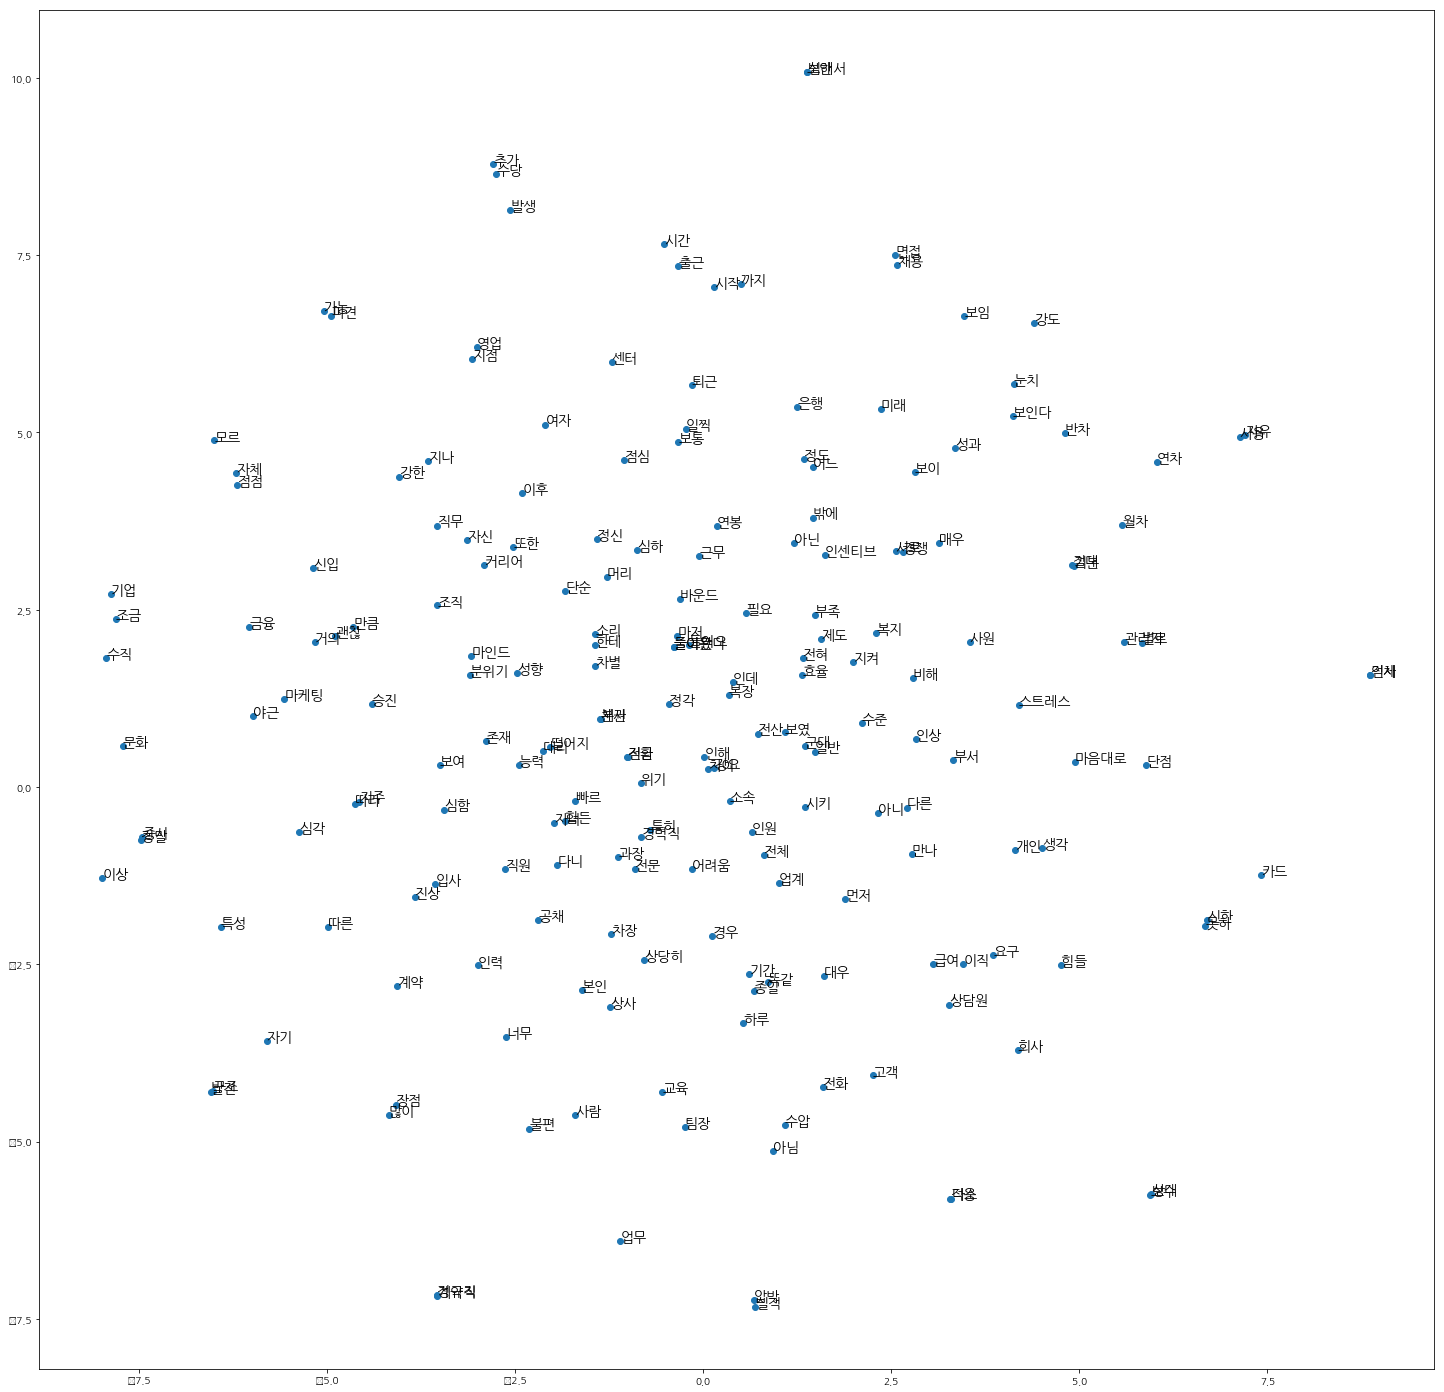

In [55]:
import matplotlib.font_manager as fm
font_path="c:/Windows/Fonts/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=14)

plt.figure(figsize=(25,25))
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(vocab)):
    plt.annotate(s=vocab[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]), fontProperties=fontprop)


plt.draw()

top200 기준 키워드를 보면 유사한 뜻을 가진 "어려움"과 "불편"이 같이 뭉쳐 있다. 
"분위기"와 "성향"
"인사"와 "적체"
"실적"과 "압박"
"관리자"와 "별로"
"근무"와 "스트레스"
"직무"와 "커리어" 
"영업"과 "지점" 등 맥락이 맞는 단어들이 가까운 거리에 위치한 것을 알 수 있다.

※ 위의 결과는 ML 특성상 모델링할 때마다 조금씩 다르게 나옴에 유의 (ㅠㅠ)

### LSA(Latent Semantic Analysis) 알고리즘 시도

LSA: Term-Document Matrix, TDM에서 Term이 너무 커질 경우 Matrix가 지나치게 희소(sparse)해지는 문제점이 있으므로
이를 N개의 잠재 의미군(Latent Semantic)으로 압축하여 텍스트 처리의 성능을 높임

일종의 차원축소. Matrix를 문서의 개수 x N(토픽=Latent Semantic)의 수 t의 크기로 줄임

In [56]:
# max_feature 제약 없이 전체 문장을 분류 
tfidfvector = TfidfVectorizer(stop_words=stopwords)
tfidtopic = tfidfvector.fit_transform(clean_data['기업단점'])
tfidtopic.shape

(143, 903)

In [57]:
from sklearn.decomposition import TruncatedSVD

# n_components=20 : 904개의 documents를 20개로 축소 (20개 토픽)
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit_transform(tfidtopic)
len(svd_model.components_)

20

In [58]:
np.shape(svd_model.components_)
# 20: topic의 수 904: tf-idf로 뽑은 단어의 수

(20, 903)

In [59]:
terms = tfidfvector.get_feature_names() # 단어 집합 (904개)

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('업무', 0.41217), ('실적', 0.29664), ('시간', 0.27783), ('퇴근', 0.23393), ('스트레스', 0.21314)]
Topic 2: [('시간', 0.36605), ('퇴근', 0.23949), ('출근', 0.22501), ('점심', 0.15615), ('복지', 0.0891)]
Topic 3: [('실적', 0.39916), ('스트레스', 0.32435), ('압박', 0.29213), ('심하', 0.18703), ('영업', 0.15228)]
Topic 4: [('업무', 0.57936), ('강도', 0.11386), ('퇴근', 0.10133), ('지치', 0.09602), ('압박', 0.08694)]
Topic 5: [('보수', 0.41434), ('상대', 0.36192), ('실적', 0.18856), ('압박', 0.15397), ('퇴근', 0.11613)]
Topic 6: [('영업', 0.22826), ('연차', 0.22319), ('힘들', 0.19753), ('부서', 0.19264), ('고객', 0.15774)]
Topic 7: [('너무', 0.27558), ('사람', 0.2686), ('압박', 0.15436), ('영업', 0.12541), ('계약직', 0.12019)]
Topic 8: [('인사', 0.47811), ('적체', 0.39146), ('심한', 0.21331), ('심각', 0.16038), ('심함', 0.14207)]
Topic 9: [('팀장', 0.43442), ('사람', 0.24129), ('복지', 0.20509), ('너무', 0.14491), ('만나', 0.13114)]
Topic 10: [('영업', 0.32558), ('문화', 0.28049), ('퇴근', 0.17814), ('지점', 0.17735), ('가능', 0.11536)]
Topic 11: [('복지', 0.40969), ('연봉', 0.30565), (

### LDA (Latent Dirichlet Allocation) 알고리즘 시도

LDA는 문서의 집합인 코퍼스로부터 어떤 토픽들이 존재하는지 분류하기 위해 사용되는 토픽 모델입니다. LDA는 코퍼스를 분석해 문서의 토픽, 다시말해, 문서의 군집을 도출합니다. 이는 문서를 토픽에 맞게 구성하는 일종의 군집화입니다. LDA는 통계적 관점에서 각 문서가 (아직 알려지지 않은) 여러 토픽의 혼합으로 표현된다고 가정합니다

관련 설명 참고: https://arongdari.tistory.com/entry/Latent-Dirichlet-Allocation
Unsupervised Generative Topic Model

In [60]:
from sklearn.decomposition import LatentDirichletAllocation

# 5개의 topic으로 분류해본다 (10개의 topic으로 분류하니, 너무 분산되는 것 같아서 5개로 줄여봄)
lda_model=LatentDirichletAllocation(n_components=5,learning_method='online',random_state=777,max_iter=1)

In [61]:
lda_top=lda_model.fit_transform(tfidtopic)
print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.70335559 0.68070338 0.7967109  ... 0.85704842 0.74628675 0.87293665]
 [0.69615388 0.63169771 0.77033194 ... 0.67464291 0.70328349 0.70876694]
 [0.80262152 0.83922213 0.76955323 ... 0.74168631 0.7536563  0.79867914]
 [0.76452009 0.71251465 0.79235257 ... 0.83129683 0.68890877 0.84045286]
 [0.70772253 0.66918017 0.78388839 ... 0.65009989 0.88365567 0.72693532]]
(5, 903)


In [62]:
get_topics(lda_model.components_,terms)

Topic 1: [('업무', 2.88255), ('퇴근', 2.52012), ('정신', 2.21752), ('수당', 1.82928), ('스트레스', 1.80182)]
Topic 2: [('상대', 2.14095), ('잘난', 2.02519), ('보수', 1.84154), ('사람', 1.74488), ('너무', 1.54119)]
Topic 3: [('복지', 3.3492), ('총알받이', 1.79724), ('귀책', 1.78135), ('올려', 1.77266), ('바람', 1.69766)]
Topic 4: [('상대', 2.12114), ('성과급제', 2.07325), ('연봉', 1.94023), ('보수', 1.85256), ('못한', 1.68108)]
Topic 5: [('다소', 1.71407), ('적응', 1.6615), ('금융', 1.59861), ('보수', 1.51072), ('자체', 1.07191)]


★★ 다음에 할 일들
* 해당 모형을 train/test set으로 나누어 성능평가?
* 최종적으로는 Word2Vec(gensim) library로 문서 분류하고 다시 t-sne으로 시각화해보기
* 현재는 부정적인 문장만 수행했는데, 기업 긍정평가도 포함하여 수행하여 긍정/부정 간 주요 나오는 키워드 category화?
* 별점과 연계해서 linear Regression?
* 이후 내부 시스템과 연계는 어떻게 할지?
* 할 일은 많은데 감이 안옴 ㅠㅠ....  